# Clustering Metrics

In [15]:
from itertools import combinations

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [69]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [6]:
n_features = 4

In [7]:
n_cluster = 5

In [8]:
cluster_std = 1.2

In [9]:
n_samples = 200

In [10]:
data1 = make_blobs(n_samples=n_samples,
                   n_features=n_features,
                   centers=n_cluster,
                   cluster_std=cluster_std)

In [11]:
d1 = data1[0]

In [13]:
df1 = pd.DataFrame(data=d1,
                   columns=[f'feature_{i}' for i in range(1, n_features + 1)])

In [14]:
df1.head()

,feature_1,feature_2,feature_3,feature_4
0,3.034682,-7.370651,-5.763777,4.157107
1,9.417304,-2.932610,1.215425,-6.490218
2,9.094824,6.952570,0.689238,0.424263
3,8.612740,7.374359,-3.240047,10.736647
4,9.140046,0.147181,0.750997,-4.152364


In [17]:
lst_vars=list(combinations(df1.columns, 2))

In [18]:
len(lst_vars)

6

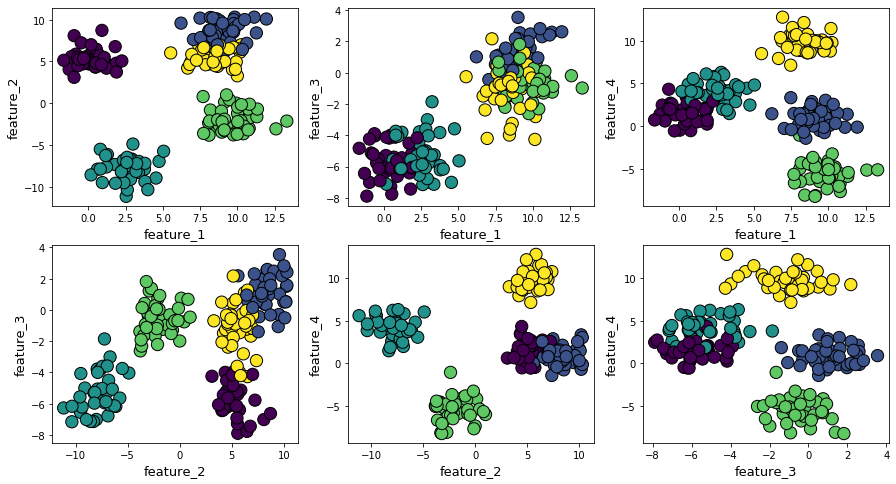

In [21]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],
                df1[dim2],
                c=data1[1],
                edgecolor='k',
                s=150)
    plt.xlabel(f'{dim1}',
               fontsize=13)
    plt.ylabel(f'{dim2}',
               fontsize=13)
    

## How are classes seperated (boxplots)

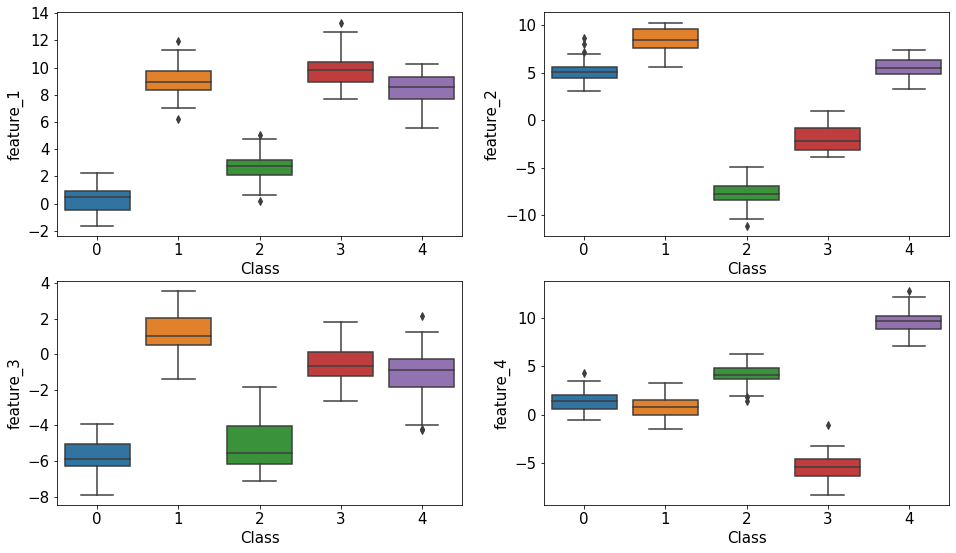

In [23]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,
                2,
                i+1)
    sns.boxplot(x=data1[1],
                y=df1[c])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Class',
               fontsize=15)
    plt.ylabel(c,
               fontsize=15)

## K-Means Clustering

In [25]:
X=df1

In [26]:
X.head()

,feature_1,feature_2,feature_3,feature_4
0,3.034682,-7.370651,-5.763777,4.157107
1,9.417304,-2.932610,1.215425,-6.490218
2,9.094824,6.952570,0.689238,0.424263
3,8.612740,7.374359,-3.240047,10.736647
4,9.140046,0.147181,0.750997,-4.152364


In [27]:
y=data1[1]

## Scaling

In [29]:
scaler=MinMaxScaler()

In [30]:
X_scaled=scaler.fit_transform(X)

## Metrics

Running k-means and comuting inter-cluster distance score for various _k_ values

In [56]:
km_scores=[]
km_silhouette=[]
v_measure_scores=[]
db_score=[]

In [57]:
for i in range(2,12):
    km=KMeans(n_clusters=i,
              random_state=0)
    km.fit(X_scaled)
    
    y_pred = km.predict(X_scaled)
    
    km_score_value = km.score(X_scaled)
    silhouette = silhouette_score(X_scaled, y_pred)
    db = davies_bouldin_score(X_scaled,y_pred)
    v_measure = v_measure_score(y, y_pred)
    
    km_scores.append(-km.score(X_scaled))
    km_silhouette.append(silhouette)
    db_score.append(db)
    v_measure_scores.append(v_measure)
    
    print(f'score for number of cluster(s) {i}: {km_score_value}')
    print(f'silhouette score for number of cluster(s) {i}: {silhouette}')
    print(f'davis bouldin score for number of cluster(s) {i}: {db}')
    print(f'V-measure score for number of cluster(s) {i}: {v_measure}')
    print()

score for number of cluster(s) 2: -29.379645249874073
silhouette score for number of cluster(s) 2: 0.4585683674814112
davis bouldin score for number of cluster(s) 2: 1.0011479347501442
V-measure score for number of cluster(s) 2: 0.5897275217561558

score for number of cluster(s) 3: -17.49907923741823
silhouette score for number of cluster(s) 3: 0.5254277172407147
davis bouldin score for number of cluster(s) 3: 0.7365465056828814
V-measure score for number of cluster(s) 3: 0.7918756684685209

score for number of cluster(s) 4: -9.309676312218937
silhouette score for number of cluster(s) 4: 0.6118137987170152
davis bouldin score for number of cluster(s) 4: 0.5624195643550802
V-measure score for number of cluster(s) 4: 0.905746099275519

score for number of cluster(s) 5: -4.6001988695320675
silhouette score for number of cluster(s) 5: 0.6565707612837832
davis bouldin score for number of cluster(s) 5: 0.49978254948701145
V-measure score for number of cluster(s) 5: 1.0

score for number of c

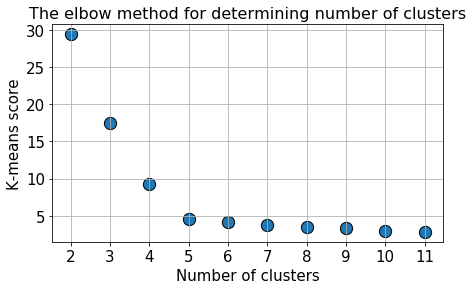

In [62]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters",
          fontsize=16)
plt.scatter(x=[i for i in range(2,len(km_scores) + 2)],
            y=km_scores,
            s=150,
            edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",
           fontsize=15)
plt.ylabel("K-means score",
           fontsize=15)
plt.xticks([i for i in range(2,12)],
           fontsize=15)
plt.yticks(fontsize=15)
plt.show()

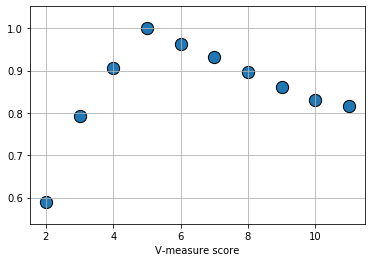

In [66]:
plt.scatter(x=[i for i in range(2,12)],
            y=v_measure_scores,
            s=150,
            edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

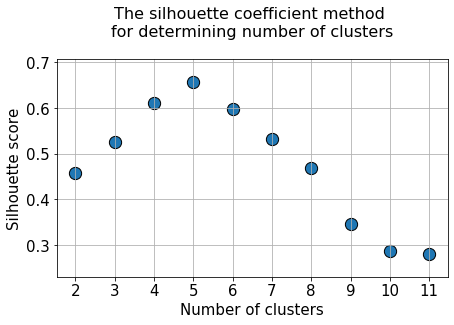

In [67]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],
            y=km_silhouette,
            s=150,
            edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",
           fontsize=15)
plt.ylabel("Silhouette score",
           fontsize=15)
plt.xticks([i for i in range(2,12)],
           fontsize=15)
plt.yticks(fontsize=15)
plt.show()

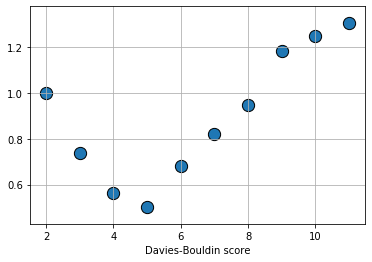

In [68]:
plt.scatter(x=[i for i in range(2,12)],
            y=db_score,
            s=150,
            edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [75]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,
                         n_init=10,
                         tol=1e-3,
                         max_iter=1000).fit(X_scaled)

    gm_bic_value = gm.bic(X_scaled)
    gm_score_value = gm.score(X_scaled)
    
    gm_bic.append(-gm_bic_value)
    gm_score.append(gm_score_value)    

    print("BIC for number of cluster(s) {}: {}".format(i,gm_bic_value))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm_score_value))
    print()


BIC for number of cluster(s) 2: -614.3146279582478
Log-likelihood score for number of cluster(s) 2: 1.9199145789703522

BIC for number of cluster(s) 3: -823.0206808426369
Log-likelihood score for number of cluster(s) 3: 2.640366612426876

BIC for number of cluster(s) 4: -919.708061876812
Log-likelihood score for number of cluster(s) 4: 3.080771966257865

BIC for number of cluster(s) 5: -981.4043101761231
Log-likelihood score for number of cluster(s) 5: 3.4336994882516945

BIC for number of cluster(s) 6: -924.4890757438561
Log-likelihood score for number of cluster(s) 6: 3.4900983034165787

BIC for number of cluster(s) 7: -872.2632885434558
Log-likelihood score for number of cluster(s) 7: 3.558220736661129

BIC for number of cluster(s) 8: -846.2945039563305
Log-likelihood score for number of cluster(s) 8: 3.691985676438867

BIC for number of cluster(s) 9: -775.019502530802
Log-likelihood score for number of cluster(s) 9: 3.7124850741205973

BIC for number of cluster(s) 10: -714.20806073

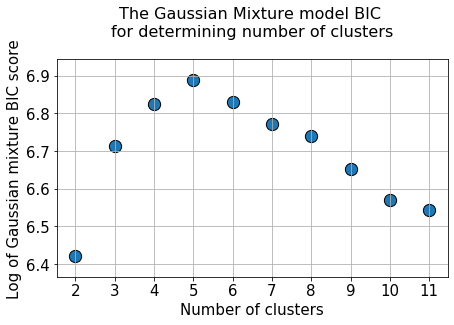

In [77]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],
            y=np.log(gm_bic),
            s=150,
            edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",
           fontsize=15)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],
           fontsize=15)
plt.yticks(fontsize=15)
plt.show()

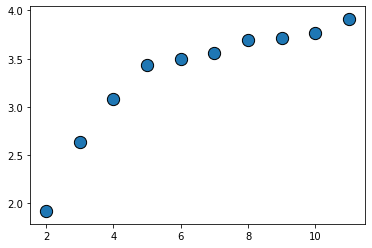

In [76]:
plt.scatter(x=[i for i in range(2,12)],
            y=gm_score,
            s=150,
            edgecolor='k')
plt.show()